In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [41]:
np.random.seed(42)

In [28]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3  * X + np.random.randn(100, 1) # y = 4 + 3x + 가우시안 노이즈(np.random.randn(100, 1))

In [29]:
X.shape

(100, 1)

In [30]:
X

array([[0.02270729],
       [0.93732128],
       [0.11260655],
       [0.23763583],
       [0.23505249],
       [1.2984206 ],
       [1.49208976],
       [1.16673753],
       [1.9243451 ],
       [0.74974116],
       [0.57142417],
       [1.73719826],
       [0.44719168],
       [1.92644508],
       [0.02430895],
       [1.93975765],
       [0.08631982],
       [1.78228623],
       [1.05540222],
       [1.98592959],
       [0.14759313],
       [1.10770857],
       [1.93860507],
       [1.04619569],
       [1.25879728],
       [1.39149738],
       [0.90908213],
       [1.25511616],
       [1.16862862],
       [1.80231602],
       [0.09089276],
       [0.56192638],
       [1.90082297],
       [1.78052757],
       [0.91131351],
       [1.2402652 ],
       [0.55476237],
       [0.37624232],
       [0.92739681],
       [0.70670446],
       [1.16731222],
       [0.15546927],
       [1.94878962],
       [1.97242149],
       [1.39632343],
       [1.07219273],
       [0.61905523],
       [1.627

In [31]:
y.shape

(100, 1)

In [32]:
y

array([[ 4.71349782],
       [ 8.18059541],
       [ 3.37289619],
       [ 5.39895896],
       [ 5.76358197],
       [ 6.13652233],
       [ 7.29301076],
       [ 5.46098041],
       [ 9.50362846],
       [ 6.96676573],
       [ 7.21662957],
       [ 9.28568955],
       [ 6.97019058],
       [ 8.39923378],
       [ 2.36954441],
       [ 9.76372526],
       [ 4.64302492],
       [ 9.31416393],
       [ 5.09876455],
       [ 9.86866874],
       [ 3.13830989],
       [ 7.99279826],
       [10.18241346],
       [ 6.19870728],
       [ 7.26252491],
       [ 7.11527861],
       [ 6.66456729],
       [ 8.7204908 ],
       [ 6.52015983],
       [ 9.91099458],
       [ 3.74242066],
       [ 4.89290631],
       [ 9.59543854],
       [ 8.30634038],
       [ 6.18029121],
       [ 6.52291769],
       [ 7.62901223],
       [ 5.16399051],
       [ 6.08246492],
       [ 6.33409328],
       [ 7.38960862],
       [ 4.24543822],
       [10.46053555],
       [10.67477218],
       [ 7.65846914],
       [ 6

In [33]:
import matplotlib.pyplot as plt

(0.0, 2.0, 0.0, 15.0)

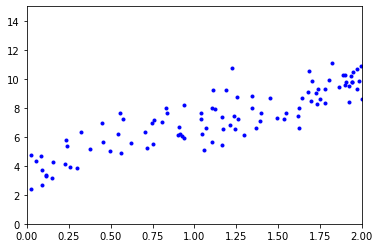

In [34]:
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15]) # x축 0부터 2까지 y축 0부터 15까지

* 정규방정식 (사이킷런 이용)

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [37]:
lin_reg.intercept_ #절편이댜 4에 가까워야함

array([3.9202609])

In [38]:
lin_reg.coef_ #기울기 3에 가까워야함 이로써 3x + 4인 것을 알 수 있음.

array([[2.9609808]])

In [40]:
lin_reg.score(X, y) #예측부터 성능까지 나옴

0.7578867823765956

  ## 경사하강법

In [42]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3  * X + np.random.randn(100, 1)

In [43]:
X_b = np.c_[np.ones((100, 1)), X]

In [44]:
X[:3]

array([[0.74908024],
       [1.90142861],
       [1.46398788]])

In [46]:
X_b[:3]# 1과 X로 이루어져 있다. 1로 이루어진 특성 추가 곱셈을 위해서임 = 절편이다.

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788]])

In [ ]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [86]:
eta = 0.1 #학습률
n_iterations = 1000 #반복하기 위함의 용도 0.1씩 증가할때 100개를 다 돌려면 1000번의 반복이 필요
m = 100 # 샘플의 개수가 100개
theta = np.random.randn(2, 1) #2개 가져온다.

In [87]:
theta 

array([[-1.51936997],
       [-0.48423407]])

* 배치 경사하강법

In [88]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # X_b.dot(theta)가 예측,    y는 실제값
    #새로운 세타 = 기존 세타 - 학습률 * 기울기
    theta = theta  - eta * gradients

In [89]:
theta #경사하강법으로 각각 4.21 과 2.77으로  절편 4와  기울기 3에 가까운 것을 알 수 있다.

array([[4.21509616],
       [2.77011339]])

In [91]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 1, 1, 1])

In [95]:
a.T

array([1, 2, 3, 4, 5])

* 확률적 경사하강법

In [107]:
n_epochs = 50
t0, t1 = 5, 50

In [108]:
def learning_schedule(t):
    return t0 / (t + t1)

In [109]:
theta = np.random.randn(2, 1)

In [125]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [127]:
theta #각각 4와 3에 가까움

array([[4.19310242],
       [2.7329462 ]])

In [111]:
from sklearn.linear_model import SGDRegressor

In [124]:
y.ravel() #다차원 배열 y를 1차원 배열로 만들어줌

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

In [121]:
sgd_reg = SGDRegressor(max_iter = 50, eta0=0.1, penalty=None, random_state=42) #패널티는 규제이다. 파라미터가 과하게 커지는 것을 방지.
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [122]:
sgd_reg.intercept_ #4에 가깝고

array([4.24365286])

In [123]:
sgd_reg.coef_ #3에 가까움

array([2.8250878])

In [128]:
a = np.array([1, 2, 3, 4, 5])

In [129]:
a**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [130]:
a, a**2

(array([1, 2, 3, 4, 5]), array([ 1,  4,  9, 16, 25], dtype=int32))

In [142]:
c = [a, a**2]
c

[array([1, 2, 3, 4, 5]), array([ 1,  4,  9, 16, 25], dtype=int32)]

# 다항회귀

In [143]:
import numpy as np

In [145]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) #2차원에 대한 선형 회귀

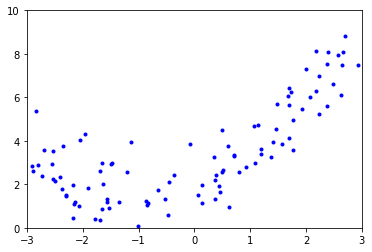

In [149]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [156]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #bias True면 항이 하나 더 생긴다.
X_poly = poly_features.fit_transform(X)


(array([[-1.20685719],
        [-2.35765693],
        [-0.35965172],
        [ 1.37827144],
        [ 2.64132483],
        [ 0.62278195],
        [ 2.17881323],
        [ 1.9349679 ],
        [-1.95994168],
        [-0.08509543],
        [-2.29845879],
        [ 1.09291897],
        [ 2.69939801],
        [-2.17746325],
        [ 1.40329878],
        [ 0.79342891],
        [ 0.50163022],
        [-0.65927859],
        [-0.86921011],
        [-2.72850487],
        [-1.69254775],
        [-2.90893871],
        [ 0.48850263],
        [-2.36488058],
        [ 2.23811636],
        [ 0.13885812],
        [ 1.19813945],
        [-0.53485745],
        [ 0.36347885],
        [ 2.65595506],
        [-2.50359576],
        [-1.47637337],
        [ 1.67992996],
        [-2.40757676],
        [-2.54603338],
        [-0.83075161],
        [-2.44699225],
        [ 0.51047065],
        [-1.6423485 ],
        [ 2.37418778],
        [ 1.70100049],
        [ 1.19823124],
        [ 0.70166416],
        [ 2

In [160]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False) #bias True면 항이 하나 더 생긴다.
X_poly = poly_features.fit_transform(X)

In [163]:
np.random.seed(42)

In [164]:
c_2 = X, X**2
c_2

(array([[-1.20685719],
        [-2.35765693],
        [-0.35965172],
        [ 1.37827144],
        [ 2.64132483],
        [ 0.62278195],
        [ 2.17881323],
        [ 1.9349679 ],
        [-1.95994168],
        [-0.08509543],
        [-2.29845879],
        [ 1.09291897],
        [ 2.69939801],
        [-2.17746325],
        [ 1.40329878],
        [ 0.79342891],
        [ 0.50163022],
        [-0.65927859],
        [-0.86921011],
        [-2.72850487],
        [-1.69254775],
        [-2.90893871],
        [ 0.48850263],
        [-2.36488058],
        [ 2.23811636],
        [ 0.13885812],
        [ 1.19813945],
        [-0.53485745],
        [ 0.36347885],
        [ 2.65595506],
        [-2.50359576],
        [-1.47637337],
        [ 1.67992996],
        [-2.40757676],
        [-2.54603338],
        [-0.83075161],
        [-2.44699225],
        [ 0.51047065],
        [-1.6423485 ],
        [ 2.37418778],
        [ 1.70100049],
        [ 1.19823124],
        [ 0.70166416],
        [ 2

In [165]:
poly_features.get_feature_names()

['x0', 'x0^2']

In [166]:
X[0]

array([-1.20685719])

In [167]:
X_poly[0]

array([-1.20685719,  1.45650427])

In [168]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [170]:
X_poly

array([[-1.20685719e+00,  1.45650427e+00],
       [-2.35765693e+00,  5.55854619e+00],
       [-3.59651721e-01,  1.29349360e-01],
       [ 1.37827144e+00,  1.89963216e+00],
       [ 2.64132483e+00,  6.97659688e+00],
       [ 6.22781952e-01,  3.87857359e-01],
       [ 2.17881323e+00,  4.74722708e+00],
       [ 1.93496790e+00,  3.74410076e+00],
       [-1.95994168e+00,  3.84137140e+00],
       [-8.50954265e-02,  7.24123162e-03],
       [-2.29845879e+00,  5.28291279e+00],
       [ 1.09291897e+00,  1.19447187e+00],
       [ 2.69939801e+00,  7.28674961e+00],
       [-2.17746325e+00,  4.74134621e+00],
       [ 1.40329878e+00,  1.96924748e+00],
       [ 7.93428905e-01,  6.29529428e-01],
       [ 5.01630222e-01,  2.51632880e-01],
       [-6.59278592e-01,  4.34648262e-01],
       [-8.69210113e-01,  7.55526221e-01],
       [-2.72850487e+00,  7.44473880e+00],
       [-1.69254775e+00,  2.86471789e+00],
       [-2.90893871e+00,  8.46192440e+00],
       [ 4.88502633e-01,  2.38634823e-01],
       [-2.

In [169]:
lin_reg.intercept_, lin_reg.coef_ # y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) 의 식 절편 2 1차항 1 2차항 0.5가 나온다.

(array([2.06321706]), array([[0.96819852, 0.4498335 ]]))

In [ ]:
lin_reg.fit(, y)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

* 규제가 있는 모델

In [171]:
## 라쏘

In [172]:
## 릿지

In [173]:
## 엘라스틱